In [ ]:
#Intermediate level - task1

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.shape

(181691, 135)

In [9]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region',
                      'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype',
                      'targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'Kill','nwound':'Wound'}, inplace=True)

In [15]:
data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attacktype','Kill','Wound','target1',
            'Summary','Group','Targettype','Weapon','motive']]
data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,target1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [18]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [19]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [20]:
data['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

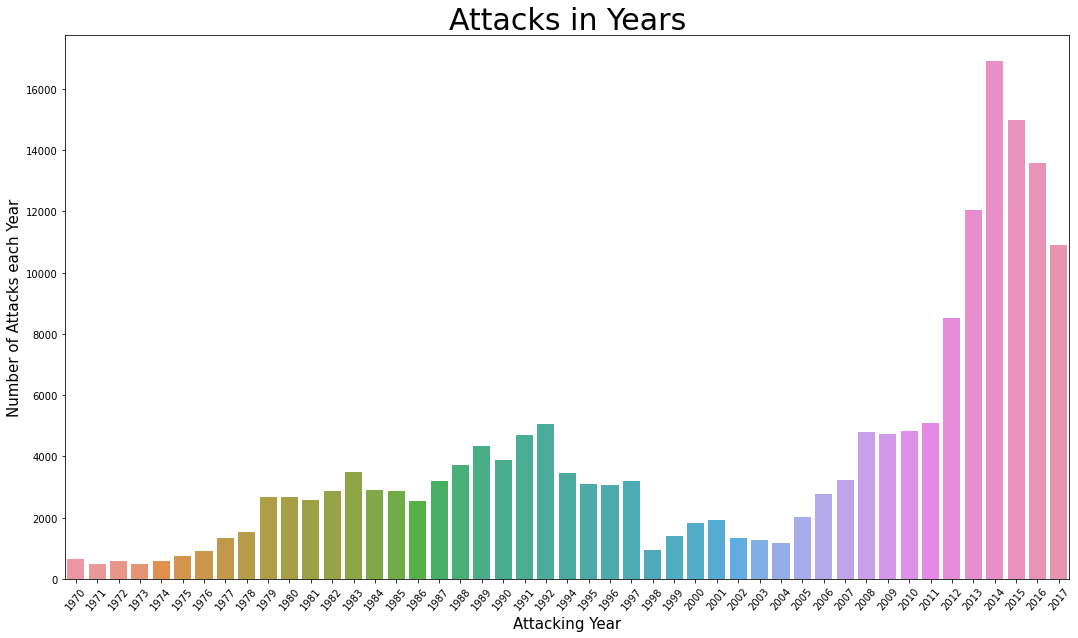

In [22]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x = year,
           y = years_count)
plt.xticks(rotation=50)
plt.xlabel("Attacking Year", fontsize = 15)
plt.ylabel("Number of Attacks each Year", fontsize = 15)
plt.title("Attacks in Years", fontsize = 30)
plt.show()

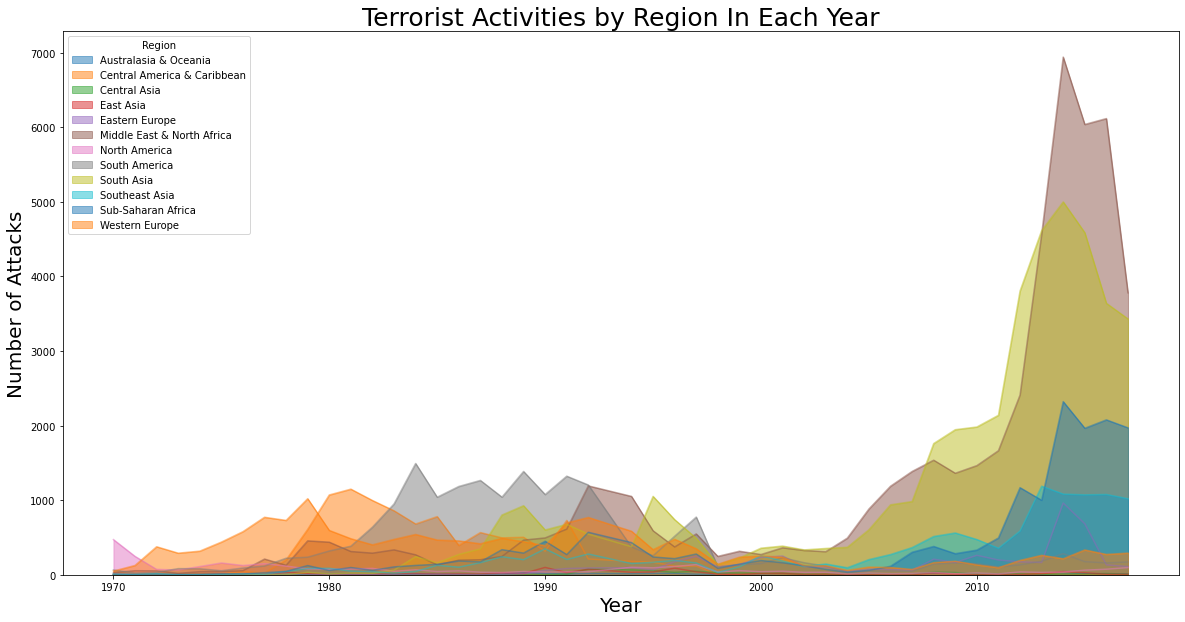

In [23]:
pd.crosstab(data.Year, data.Region).plot(kind='area', stacked=False, figsize=(20,10))
plt.title("Terrorist Activities by Region In Each Year", fontsize = 25)
plt.ylabel("Number of Attacks", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.show()

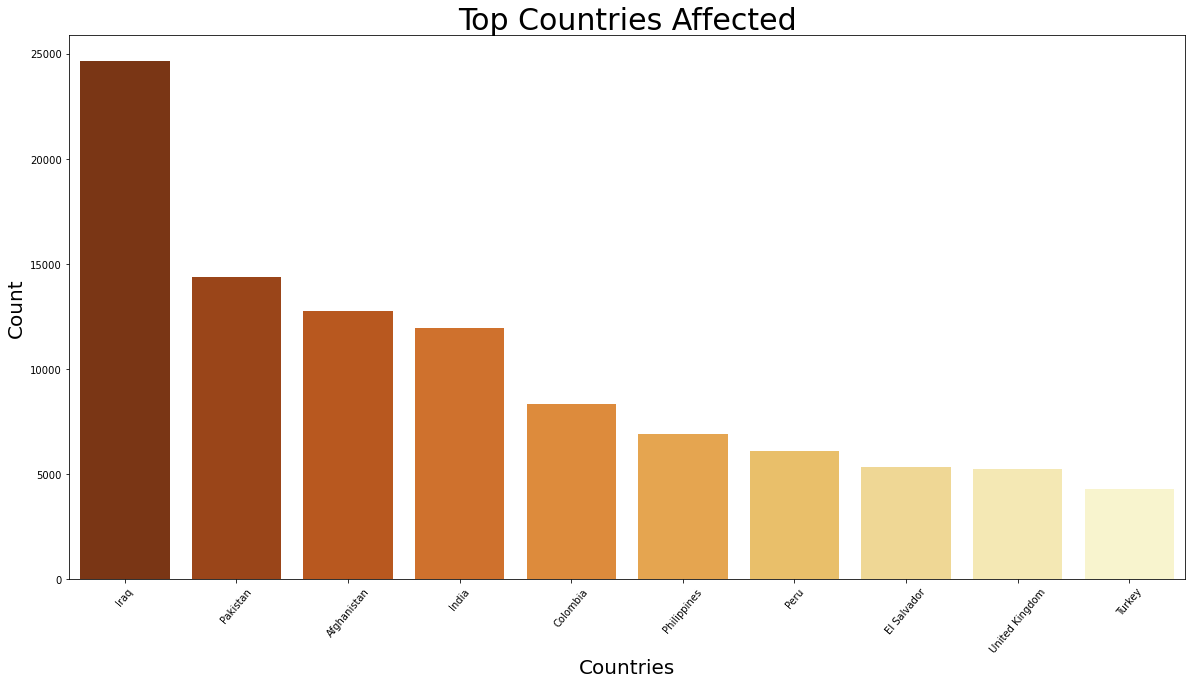

In [24]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index, data['Country'].value_counts()[:10].values, palette='YlOrBr_r')
plt.title("Top Countries Affected", fontsize=30)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation = 50)
plt.show()

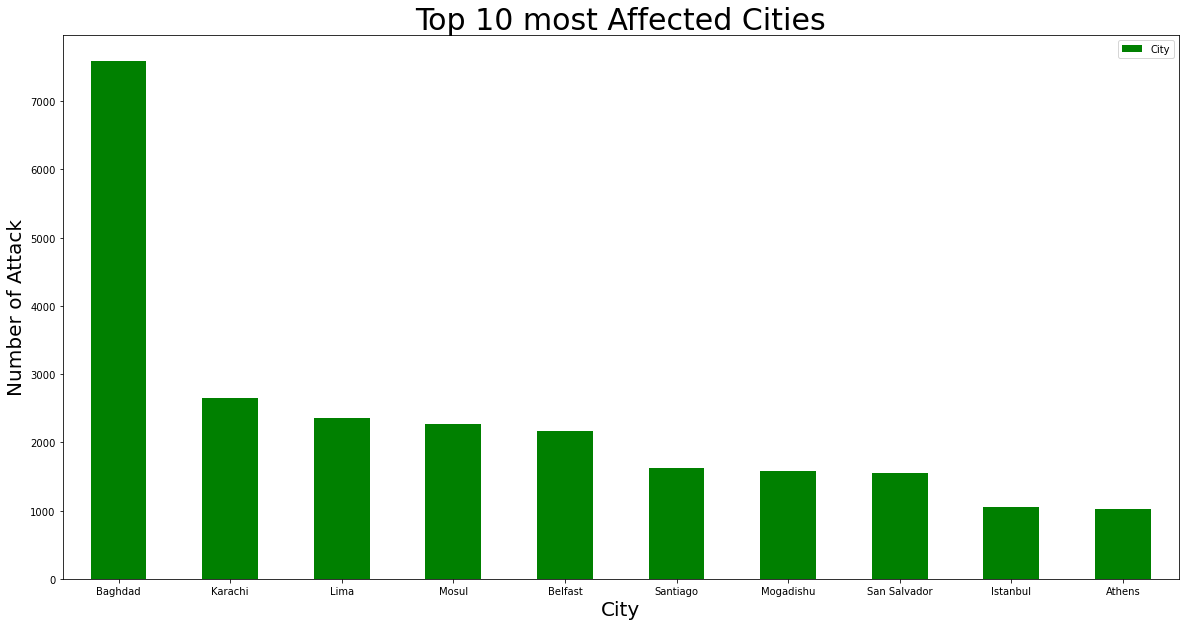

In [31]:
data['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 0)
plt.xlabel("City", fontsize=20)
plt.ylabel("Number of Attack", fontsize=20)
plt.title("Top 10 most Affected Cities", fontsize=30)
plt.show()

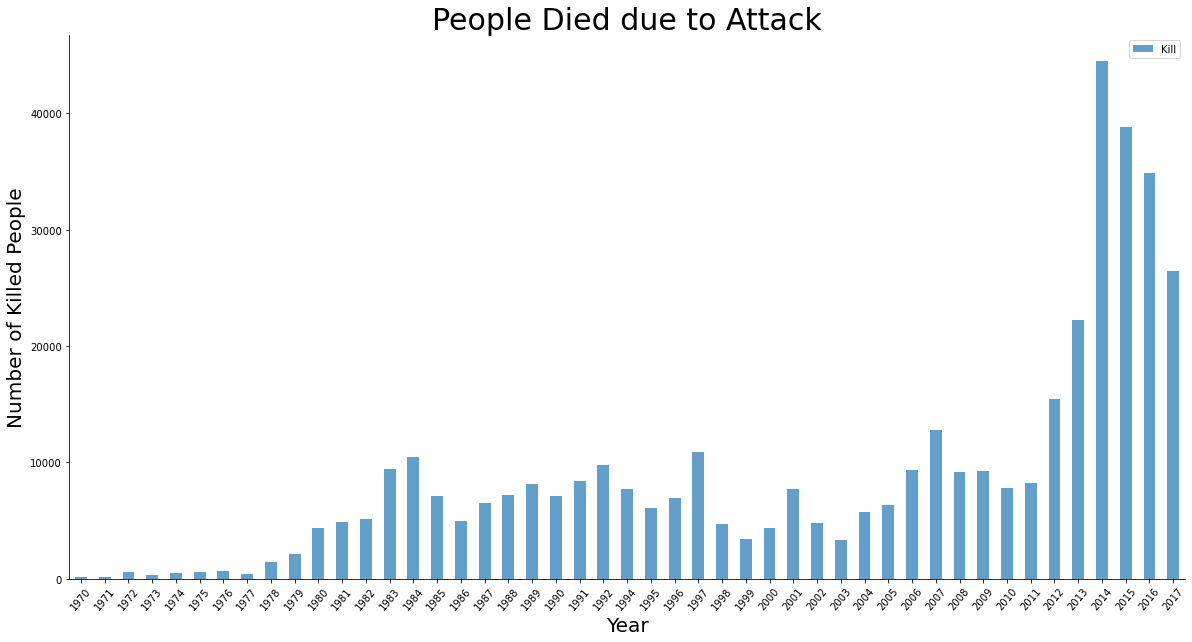

In [27]:
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind = 'bar', alpha=0.7, ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died due to Attack", fontsize=30)
plt.ylabel("Number of Killed People", fontsize=20)
plt.xlabel("Year", fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

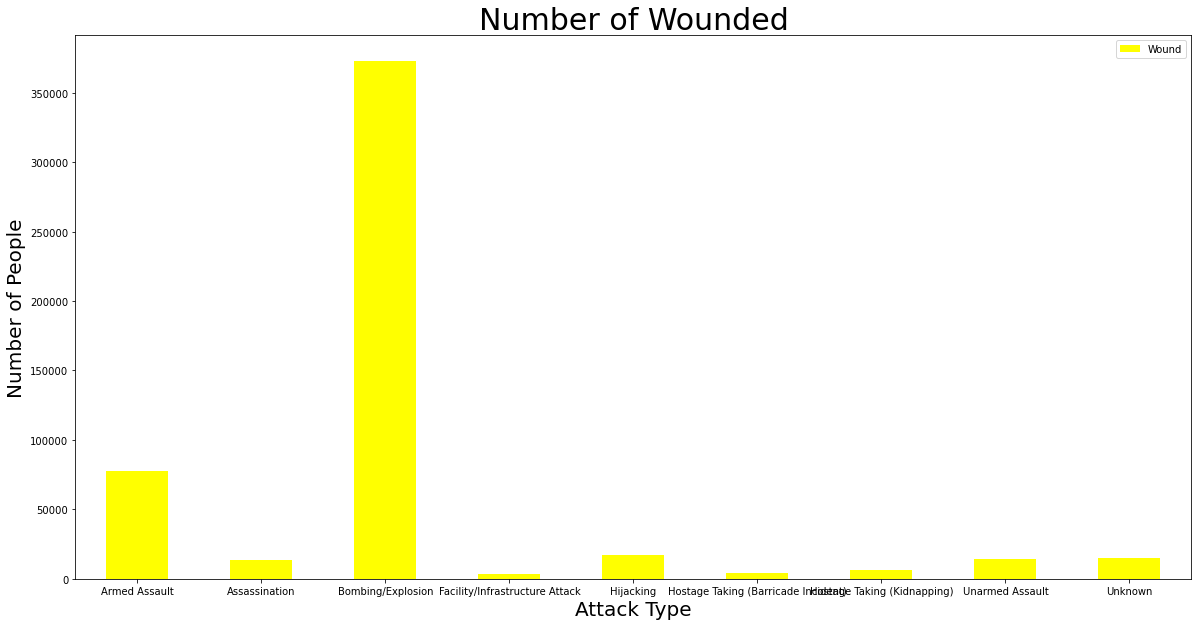

In [35]:
data[['Attacktype','Wound']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['yellow'])
plt.xticks(rotation = 0)
plt.xlabel("Attack Type", fontsize=20)
plt.ylabel("Number of People", fontsize=20)
plt.title("Number of people Wounded", fontsize=30)
plt.show()

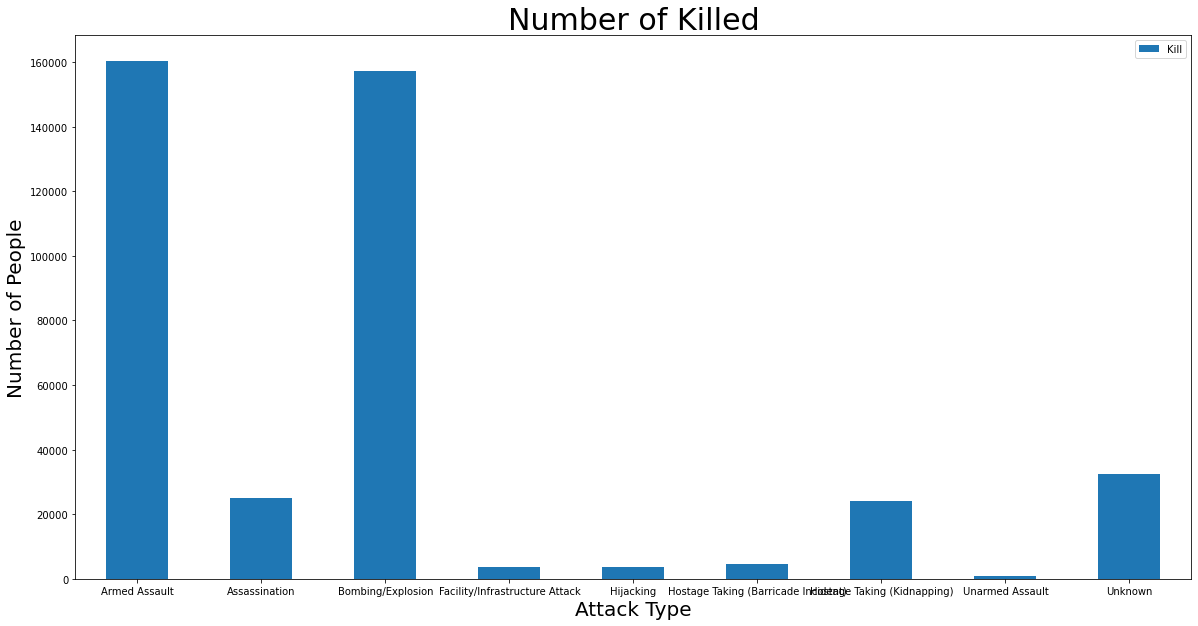

In [33]:
data[['Attacktype','Kill']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation = 0)
plt.xlabel("Attack Type", fontsize=20)
plt.ylabel("Number of People", fontsize=20)
plt.title("Number of people killed", fontsize=30)
plt.show()

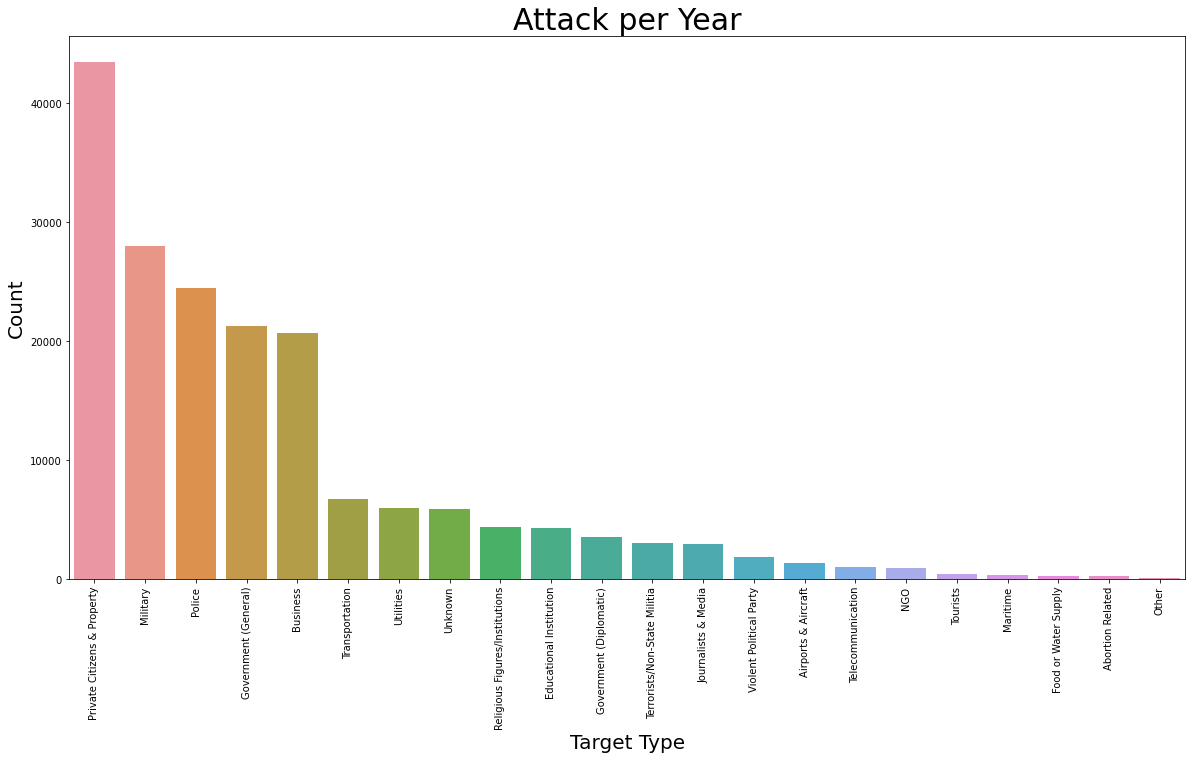

In [36]:
plt.subplots(figsize=(20,10))
sns.countplot(data['Targettype'],order= data['Targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Target Type", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Attack per year", fontsize=30)
plt.show()

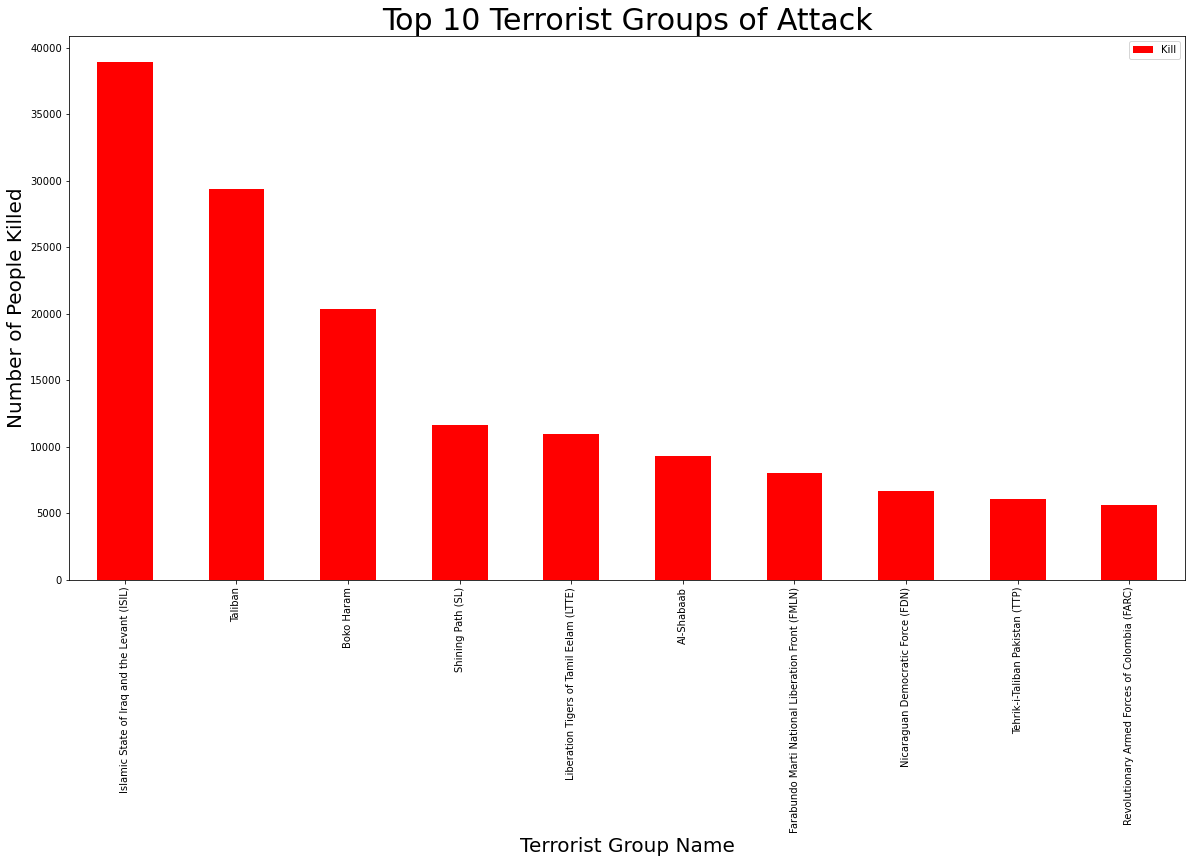

In [38]:
data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(
                                kind='bar',color='red',figsize=(20,10))
plt.xlabel("Terrorist Group Name", fontsize=20)
plt.ylabel("Number of People Killed", fontsize=20)
plt.title("Top 10 Terrorist Groups of Attack", fontsize=30)
plt.show()

In [40]:
df = data[['Group','Country','Kill']]
df = df.groupby(['Group','Country'], axis=0).sum().sort_values('Kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [42]:
kill = data.loc[:,'Kill']
print("Number of People Killed by Terror Attack:: ", int(sum(kill.dropna())))

Number of People Killed by Terror Attack::  411868


In [43]:
type_kill = data.pivot_table(columns="Attacktype", values='Kill', aggfunc='sum')
type_kill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [44]:
country_kill = data.pivot_table(columns="Country", values='Kill', aggfunc='sum')
country_kill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
